In [46]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline # magic command line: draws plots, userful for interactive data exploration and visualization that will allow user to see data immediately without opening a separate window
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots we will create

pd.options.display.float_format = '{:,.2f}'.format #disables scientific notation for budget and gross

# Read in the data

df = pd.read_csv(r'C:\Users\Aladdin\Desktop\SQL Projects\SQL Project 4\movies.csv')

UsageError: unrecognized arguments: # magic command line: draws plots, userful for interactive data exploration and visualization that will allow user to see data immediately without opening a separate window


In [4]:
# Looking thru current data

df.head() # returns dataframe (df) rows

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [6]:
# Checking for missing data with a for loop

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
#Data types for Columns, checks for data types in file

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
# Changing column data type to an integer

df['budget'] = df['budget'].astype('int64') # changes budget column data type to integer

df['gross'] = df['gross'].astype('int64') # changes gross column data type to integer

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [10]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [41]:
# Create the correct year column

def extract_year(df):
    df['yearcorrect'] = df['released'].str.extract(r'(\d{4})') #() around r'(\d{4})' creates a capture group that extracts the matched year: r = regular, \d = digits characters, {4} = matching characters
    return df
df = extract_year(df.copy())
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime yearcorrect  
0      46998772.0               Warner Bros.    146.0        1980  
1      58853106.0          Columbia Pictures    104.0        1980  
2     538375067.0                  Lucasfilm    124.0        1980  
3      83453539.0         Paramount Pictures     88.0        1980  
4      39846344.0             Orion Pictures     98.0        1980  
...           ...                        ...      ...         ...  
7663          NaN                        NaN     90.0        2020  
7664          NaN  Cactus Blue Entertainment     90.0        2020  
7665          NaN           Embi Productions      NaN        2020  
7666          NaN                        NaN    120.0        2020  
7667          NaN                PK 65 Films    102.0        2020  

[7668 rows x 16 columns]

In [101]:
# Order by gross revenue

df = df.sort_values(by = ['gross'], inplace = False, ascending = False) 

In [77]:
#Displays all data in rows

pd.set_option('display.max_rows', None)

In [51]:
# Drop duplicate data

df['company'].drop_duplicates().sort_values(ascending = False)

# df['company'].sort_values(ascending = False)

# df.drop_duplicates() # typically do not run this as all data is needed

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [52]:
df

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
16                                                 Fame          R      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
19                                           Stir Crazy          R     Comedy   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
27                                    Raise the Titanic         PG     Action   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
33                     Cattle Annie and Little Britches         PG      Drama   
34                                 Seems Like Old Times         PG     Comedy   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                             The Watcher in the Woods         PG     Family   
41                                       Breaker Morant         PG      Drama   
42                                        The Stunt Man          R     Action   
43                               Where the Buffalo Roam          R  Biography   
44                                        The Awakening          R     Horror   
45                        Cheech and Chong's Next Movie          R     Comedy   
46                                           The Island          R     Action   
47                                       The Boogey Man          R     Horror   
48                                        The Nude Bomb         PG     Action   
4

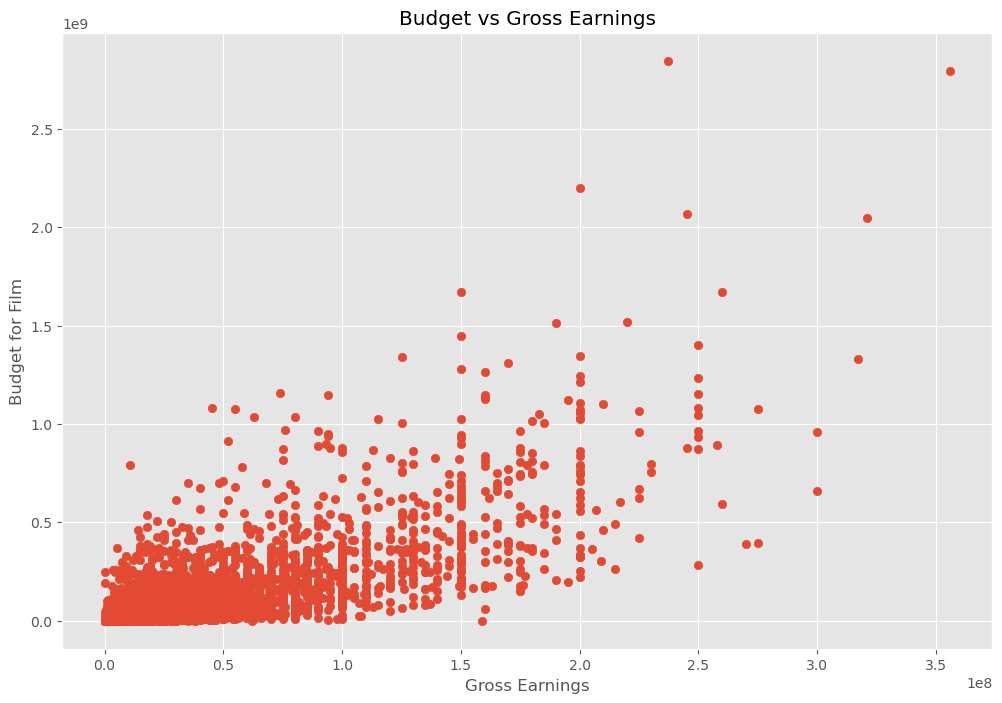

In [55]:
# Compare Budge and Gross Avenue with Scatter Plot

plt.scatter(x = df['budget'], y = df['gross']) # creates scatter plot

plt.title('Budget vs Gross Earnings') #labels title of scatter plot

plt.xlabel('Gross Earnings') # labels x-axis

plt.ylabel('Budget for Film') # labels y-axis

plt.show() # displays scatter plot

In [57]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score        votes         director  \
0  June 13, 1980 (United States)   8.40   927,000.00  Stanley Kubrick   
1   July 2, 1980 (United States)   5.80    65,000.00   Randal Kleiser   
2  June 20, 1980 (United States)   8.70 1,200,000.00   Irvin Kershner   
3   July 2, 1980 (United States)   7.70   221,000.00     Jim Abrahams   
4  July 25, 1980 (United States)   7.30   108,000.00     Harold Ramis   

                    writer            star         country        budget  \
0             Stephen King  Jack Nicholson  United Kingdom 19,000,000.00   
1  Henry De Vere Stacpoole  Brooke Shields   United States  4,500,000.00   
2           Leigh Brackett     Mark Hamill   United States 18,000,000.00   
3             Jim Abrahams     Robert Hays   United States  3,500,000.00   
4       Brian Doyle-Murray     Chevy Chase   United States  6,000,000.00   

           gross             company  runtime yearcorrect  
0  46,998,772.00        Warner Bros.   146.00        1980  
1  58,853,106.00   Columbia Pictures   104.00        1980  
2 538,375,067.00           Lucasfilm   124.00        1980  
3  83,453,539.00  Paramount Pictures    88.00        1980  
4  39,846,344.00      Orion Pictures    98.00        1980

<Axes: xlabel='budget', ylabel='gross'>

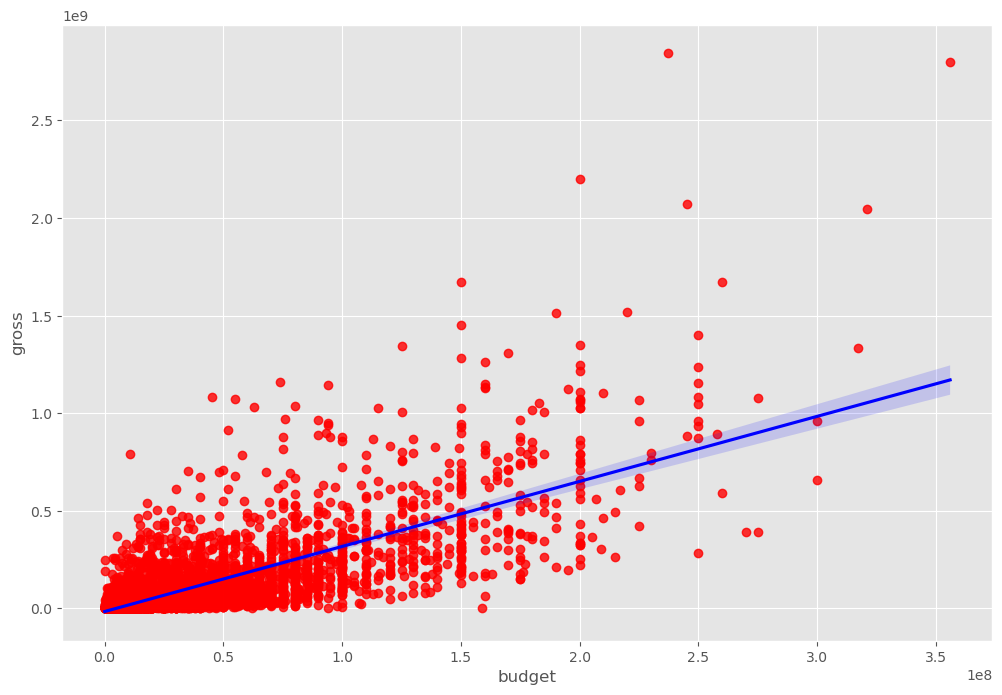

In [60]:
# Plot the budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})

In [66]:
# Displays correlation in data (only works on numerical columns)
#different types of correlations called methods: pearson (default), kendall, spearman

df.corr(method = 'pearson')

C:\Users\Aladdin\AppData\Local\Temp\ipykernel_12880\3772044449.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')


year  score  votes  budget  gross  runtime
year     1.00   0.10   0.22    0.33   0.26     0.12
score    0.10   1.00   0.41    0.08   0.19     0.40
votes    0.22   0.41   1.00    0.44   0.63     0.31
budget   0.33   0.08   0.44    1.00   0.74     0.32
gross    0.26   0.19   0.63    0.74   1.00     0.25
runtime  0.12   0.40   0.31    0.32   0.25     1.00

C:\Users\Aladdin\AppData\Local\Temp\ipykernel_12880\2075368675.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


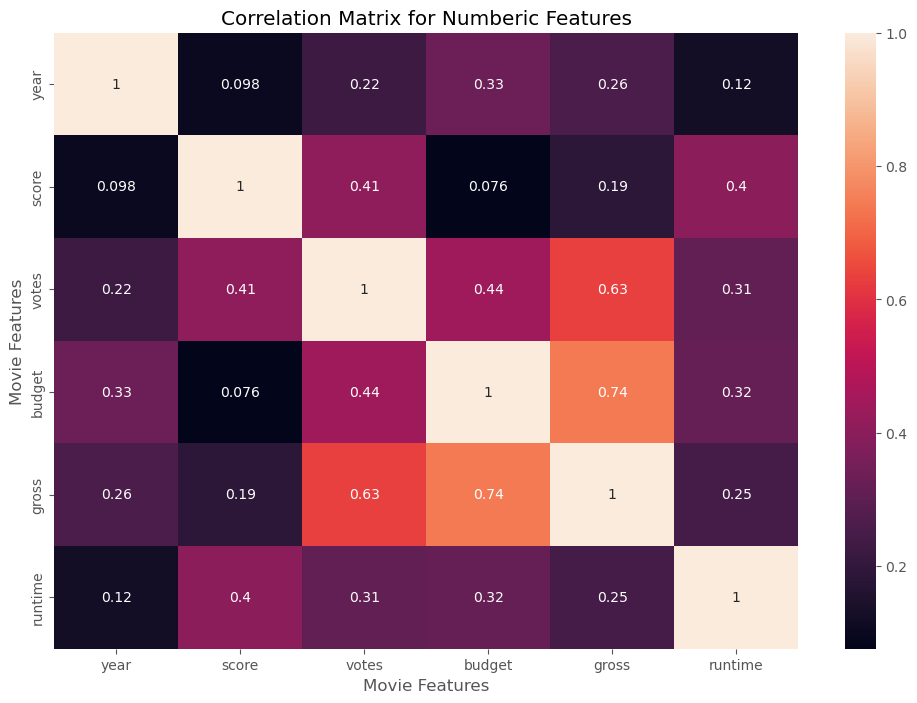

In [70]:
# Visualization correlation matrix

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True) # making annot true will show numbers

plt.title('Correlation Matrix for Numberic Features') #labels title of scatter plot

plt.xlabel('Movie Features') # labels x-axis

plt.ylabel('Movie Features') # labels y-axis

plt.show()

In [72]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score        votes         director  \
0  June 13, 1980 (United States)   8.40   927,000.00  Stanley Kubrick   
1   July 2, 1980 (United States)   5.80    65,000.00   Randal Kleiser   
2  June 20, 1980 (United States)   8.70 1,200,000.00   Irvin Kershner   
3   July 2, 1980 (United States)   7.70   221,000.00     Jim Abrahams   
4  July 25, 1980 (United States)   7.30   108,000.00     Harold Ramis   

                    writer            star         country        budget  \
0             Stephen King  Jack Nicholson  United Kingdom 19,000,000.00   
1  Henry De Vere Stacpoole  Brooke Shields   United States  4,500,000.00   
2           Leigh Brackett     Mark Hamill   United States 18,000,000.00   
3             Jim Abrahams     Robert Hays   United States  3,500,000.00   
4       Brian Doyle-Murray     Chevy Chase   United States  6,000,000.00   

           gross             company  runtime yearcorrect  
0  46,998,772.00        Warner Bros.   146.00        1980  
1  58,853,106.00   Columbia Pictures   104.00        1980  
2 538,375,067.00           Lucasfilm   124.00        1980  
3  83,453,539.00  Paramount Pictures    88.00        1980  
4  39,846,344.00      Orion Pictures    98.00        1980

In [112]:
# Changes object type to numerical values

df_numerical = df.copy()

for col_name in df_numerical.columns:
    if(df_numerical[col_name].dtype == 'object'):
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes
        
df_numerical.head()

name  rating  genre  year  released  score        votes  director  \
5445   533       5      0  2009       696   7.80 1,100,000.00      1155   
7445   535       5      0  2019       183   8.40   903,000.00       162   
3045  6896       5      6  1997       704   7.80 1,100,000.00      1155   
6663  5144       5      0  2015       698   7.80   876,000.00      1125   
7244   536       5      0  2018       192   8.40   897,000.00       162   

      writer  star  country         budget            gross  company  runtime  \
5445    1778  2334       55 237,000,000.00 2,847,246,203.00     2253   162.00   
7445     743  2241       55 356,000,000.00 2,797,501,328.00     1606   181.00   
3045    1778  1595       55 200,000,000.00 2,201,647,264.00     2253   194.00   
6663    2550   524       55 245,000,000.00 2,069,521,700.00     1540   138.00   
7244     743  2241       55 321,000,000.00 2,048,359,754.00     1606   149.00   

      yearcorrect  
5445           29  
7445           39  
3045           17  
6663           35  
7244           38

In [111]:
df.head()

name  rating  genre  year  released  score        votes  director  \
5445   533       5      0  2009       696   7.80 1,100,000.00      1155   
7445   535       5      0  2019       183   8.40   903,000.00       162   
3045  6896       5      6  1997       704   7.80 1,100,000.00      1155   
6663  5144       5      0  2015       698   7.80   876,000.00      1125   
7244   536       5      0  2018       192   8.40   897,000.00       162   

      writer  star  country         budget            gross  company  runtime  \
5445    1778  2334       55 237,000,000.00 2,847,246,203.00     2253   162.00   
7445     743  2241       55 356,000,000.00 2,797,501,328.00     1606   181.00   
3045    1778  1595       55 200,000,000.00 2,201,647,264.00     2253   194.00   
6663    2550   524       55 245,000,000.00 2,069,521,700.00     1540   138.00   
7244     743  2241       55 321,000,000.00 2,048,359,754.00     1606   149.00   

      yearcorrect  
5445           29  
7445           39  
3045           17  
6663           35  
7244           38

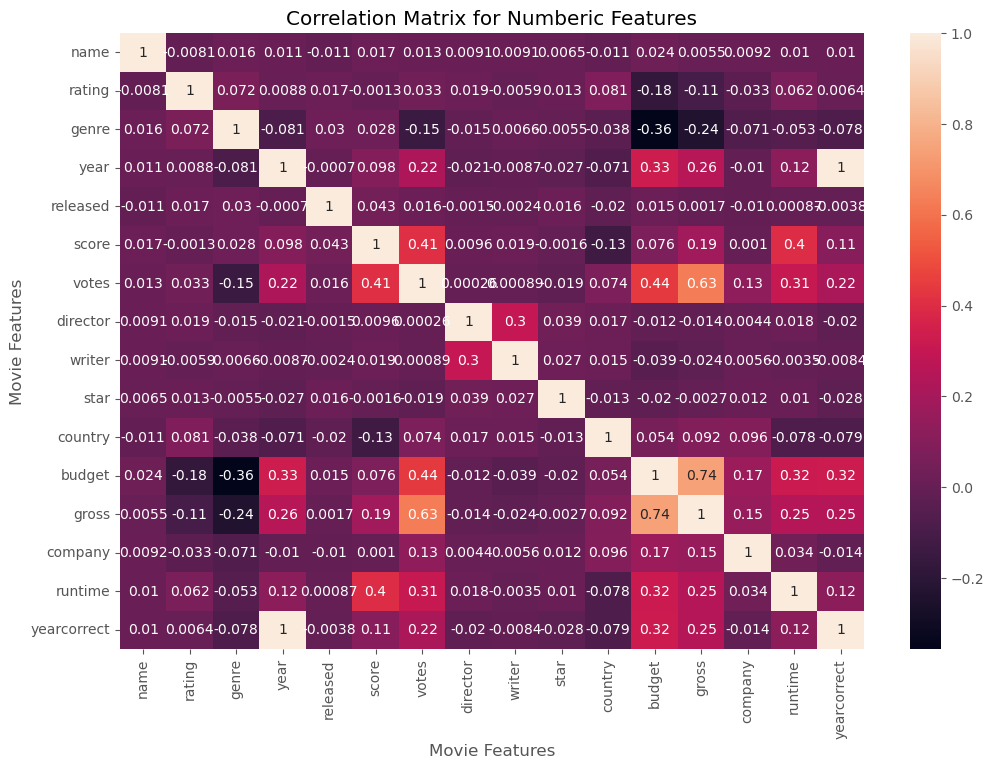

In [100]:
correlation_matrix = df_numerical.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True) # making annot true will show numbers

plt.title('Correlation Matrix for Numberic Features') #labels title of scatter plot

plt.xlabel('Movie Features') # labels x-axis

plt.ylabel('Movie Features') # labels y-axis

plt.show()

In [104]:
df_numerical.corr()

name  rating  genre  year  released  score  votes  director  \
name         1.00   -0.01   0.02  0.01     -0.01   0.02   0.01      0.01   
rating      -0.01    1.00   0.07  0.01      0.02  -0.00   0.03      0.02   
genre        0.02    0.07   1.00 -0.08      0.03   0.03  -0.15     -0.02   
year         0.01    0.01  -0.08  1.00     -0.00   0.10   0.22     -0.02   
released    -0.01    0.02   0.03 -0.00      1.00   0.04   0.02     -0.00   
score        0.02   -0.00   0.03  0.10      0.04   1.00   0.41      0.01   
votes        0.01    0.03  -0.15  0.22      0.02   0.41   1.00      0.00   
director     0.01    0.02  -0.02 -0.02     -0.00   0.01   0.00      1.00   
writer       0.01   -0.01   0.01 -0.01     -0.00   0.02   0.00      0.30   
star         0.01    0.01  -0.01 -0.03      0.02  -0.00  -0.02      0.04   
country     -0.01    0.08  -0.04 -0.07     -0.02  -0.13   0.07      0.02   
budget       0.02   -0.18  -0.36  0.33      0.01   0.08   0.44     -0.01   
gross        0.01   -0.11  -0.24  0.26      0.00   0.19   0.63     -0.01   
company      0.01   -0.03  -0.07 -0.01     -0.01   0.00   0.13      0.00   
runtime      0.01    0.06  -0.05  0.12      0.00   0.40   0.31      0.02   
yearcorrect  0.01    0.01  -0.08  1.00     -0.00   0.11   0.22     -0.02   

             writer  star  country  budget  gross  company  runtime  \
name           0.01  0.01    -0.01    0.02   0.01     0.01     0.01   
rating        -0.01  0.01     0.08   -0.18  -0.11    -0.03     0.06   
genre          0.01 -0.01    -0.04   -0.36  -0.24    -0.07    -0.05   
year          -0.01 -0.03    -0.07    0.33   0.26    -0.01     0.12   
released      -0.00  0.02    -0.02    0.01   0.00    -0.01     0.00   
score          0.02 -0.00    -0.13    0.08   0.19     0.00     0.40   
votes          0.00 -0.02     0.07    0.44   0.63     0.13     0.31   
director       0.30  0.04     0.02   -0.01  -0.01     0.00     0.02   
writer         1.00  0.03     0.02   -0.04  -0.02     0.01    -0.00   
star           0.03  1.00    -0.01   -0.02  -0.00     0.01     0.01   
country        0.02 -0.01     1.00    0.05   0.09     0.10    -0.08   
budget        -0.04 -0.02     0.05    1.00   0.74     0.17     0.32   
gross         -0.02 -0.00     0.09    0.74   1.00     0.15     0.25   
company        0.01  0.01     0.10    0.17   0.15     1.00     0.03   
runtime       -0.00  0.01    -0.08    0.32   0.25     0.03     1.00   
yearcorrect   -0.01 -0.03    -0.08    0.32   0.25    -0.01     0.12   

             yearcorrect  
name                0.01  
rating              0.01  
genre              -0.08  
year                1.00  
released           -0.00  
score               0.11  
votes               0.22  
director           -0.02  
writer             -0.01  
star               -0.03  
country            -0.08  
budget              0.32  
gross               0.25  
company            -0.01  
runtime             0.12  
yearcorrect         1.00

In [106]:
correlation_matrix = df_numerical.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name         name           1.00
             rating        -0.01
             genre          0.02
             year           0.01
             released      -0.01
             score          0.02
             votes          0.01
             director       0.01
             writer         0.01
             star           0.01
             country       -0.01
             budget         0.02
             gross          0.01
             company        0.01
             runtime        0.01
             yearcorrect    0.01
rating       name          -0.01
             rating         1.00
             genre          0.07
             year           0.01
             released       0.02
             score         -0.00
             votes          0.03
             director       0.02
             writer        -0.01
             star           0.01
             country        0.08
             budget        -0.18
             gross         -0.11
             company       -0.03
          

In [107]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.36
budget       genre         -0.36
genre        gross         -0.24
gross        genre         -0.24
rating       budget        -0.18
budget       rating        -0.18
votes        genre         -0.15
genre        votes         -0.15
score        country       -0.13
country      score         -0.13
gross        rating        -0.11
rating       gross         -0.11
year         genre         -0.08
genre        year          -0.08
yearcorrect  country       -0.08
country      yearcorrect   -0.08
             runtime       -0.08
runtime      country       -0.08
genre        yearcorrect   -0.08
yearcorrect  genre         -0.08
genre        company       -0.07
company      genre         -0.07
year         country       -0.07
country      year          -0.07
genre        runtime       -0.05
runtime      genre         -0.05
budget       writer        -0.04
writer       budget        -0.04
genre        country       -0.04
country      genre         -0.04
rating    

In [108]:
high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

votes        gross         0.63
gross        votes         0.63
             budget        0.74
budget       gross         0.74
yearcorrect  year          1.00
year         yearcorrect   1.00
name         name          1.00
company      company       1.00
gross        gross         1.00
budget       budget        1.00
country      country       1.00
star         star          1.00
writer       writer        1.00
director     director      1.00
votes        votes         1.00
score        score         1.00
released     released      1.00
year         year          1.00
genre        genre         1.00
rating       rating        1.00
runtime      runtime       1.00
yearcorrect  yearcorrect   1.00
dtype: float64

In [ ]:
# Votes and Gross have the highest correlation to gross earnings

# Company has low correlation